In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

2024-04-26 08:42:43.016646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 08:42:43.016768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 08:42:43.171379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (359).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (230).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-O

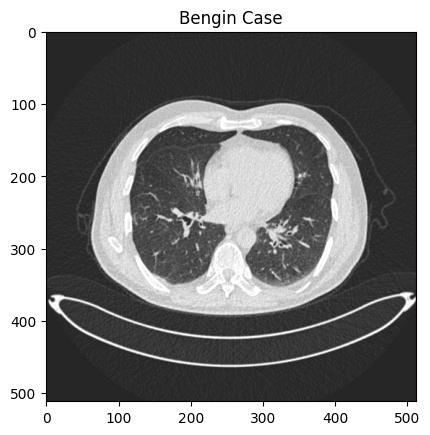

In [2]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

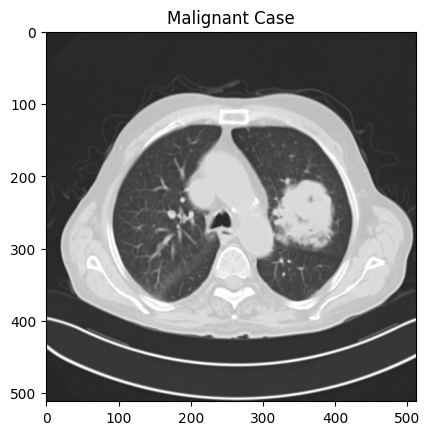

In [3]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)

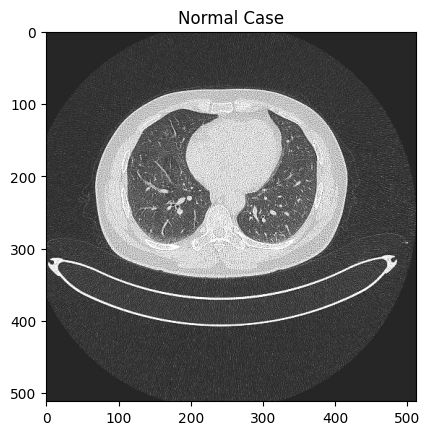

In [4]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [5]:
img.shape

(512, 512, 3)

In [6]:
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [7]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [8]:
random.shuffle(img_data)

In [9]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [10]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [11]:
for i in range(len(X)):
    X[i] = X[i]/255.0

In [12]:
X.shape

(1097, 256, 256, 3)

In [13]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [15]:
model = Sequential()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate the image by up to 15 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift the image vertically by up to 10% of the height
    shear_range=0.1,        # Shear the image by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)

# Fit the ImageDataGenerator on your training data
datagen.fit(x_train)

# Define the number of augmented images to generate per original image
augmented_images_per_original = 6

# Generate augmented images and append them to the training data
augmented_x_train = []
augmented_y_train = []
for i in range(len(x_train)):
    for _ in range(augmented_images_per_original):
        augmented_image = datagen.flow(np.expand_dims(x_train[i], axis=0), batch_size=1)[0][0]
        augmented_x_train.append(augmented_image)
        augmented_y_train.append(y_train[i])

# Convert lists to numpy arrays
augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

# Concatenate original and augmented training data
x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)


In [17]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [18]:
# Save the model
model.save("lung_cancer_detection_model.h5")
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("lung_cancer_detection_model.h5")


In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │    49,155,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15


I0000 00:00:1714121084.999200      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714121085.023012      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4233 - loss: 1.3069

W0000 00:00:1714121118.281338      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4237 - loss: 1.2981   

W0000 00:00:1714121119.410459      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4241 - loss: 1.2901 - val_accuracy: 0.5455 - val_loss: 0.9566
Epoch 2/15


W0000 00:00:1714121125.889003      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.5042 - loss: 0.9705 - val_accuracy: 0.6364 - val_loss: 0.8090
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.5291 - loss: 0.8950 - val_accuracy: 0.5682 - val_loss: 0.8868
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.6995 - loss: 0.7623 - val_accuracy: 0.7898 - val_loss: 0.6056
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.7783 - loss: 0.5362 - val_accuracy: 0.8295 - val_loss: 0.4508
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.8531 - loss: 0.3491 - val_accuracy: 0.8807 - val_loss: 0.3307
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9132 - loss: 0.2353 - val_accuracy: 0.9602 - val_loss: 0.1378
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9638 - loss: 0.0944 - val_accuracy: 0.9602 - val_loss: 0.0975
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.9777 - loss: 0.0792 - val_accuracy: 0.9716 - val_

In [23]:
result = model.predict(x_test)

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

W0000 00:00:1714121197.748203      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


W0000 00:00:1714121208.346948      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9820 - loss: 0.0334
Test Loss: 0.053132183849811554
Test Accuracy: 0.9818181991577148


W0000 00:00:1714121209.654863      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


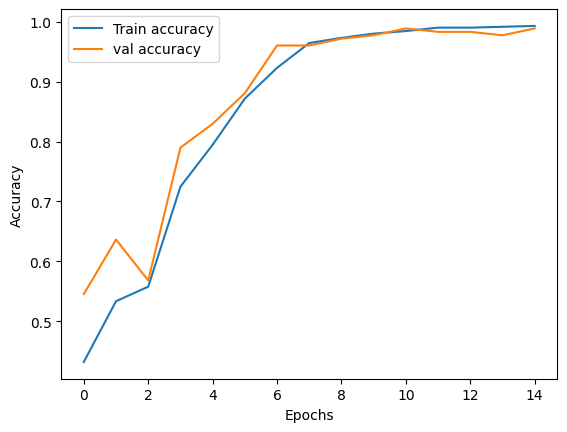

In [25]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

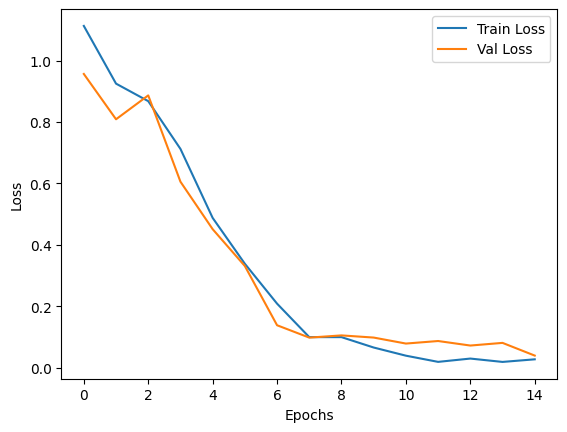

In [26]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class Label: 0
Confidence: 1.0
Predicted Category: Benign


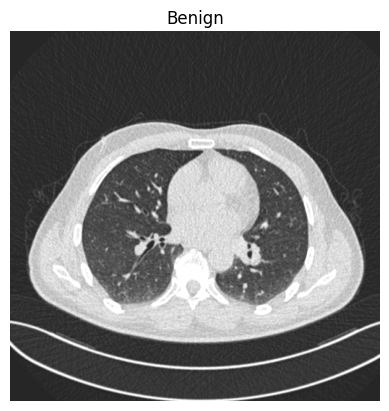

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/valid/Bengin cases/Bengin case (114).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width)) 

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Label: 1
Confidence: 1.0
Predicted Category: Malignant


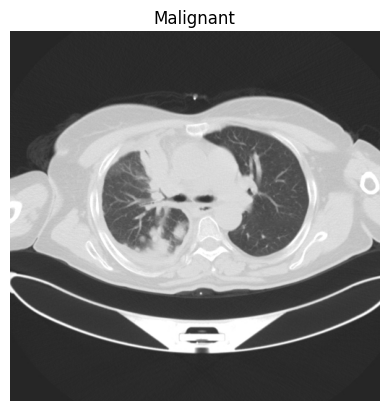

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/test/MalignantCases/Malignant case (464).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width)) 

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Label: 2
Confidence: 1.0
Predicted Category: Normal


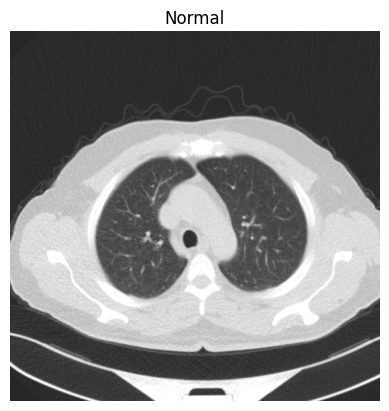

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/kaggle/input/ct-scan-images-for-lung-cancer/LungcancerDataSet/Data/valid/normal/Normal case (345).jpg'
img = cv2.imread(image_path)


img = cv2.resize(img, (img_height, img_width))  

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

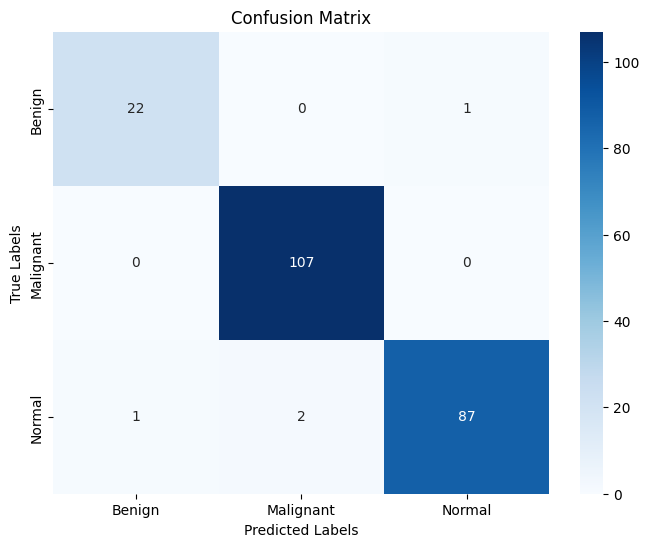

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define true labels and predicted labels
true_labels = y_test  
predicted_labels = np.argmax(result, axis=1)  

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels_to_categories.values(), 
            yticklabels=class_labels_to_categories.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()